In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
trainset = datasets.MNIST('TRAINSET',download=True, train=True, transform=transform)

valset = datasets.MNIST('TESTSET',download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 6159837.86it/s]                             


Extracting TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 97873.01it/s]            
0it [00:00, ?it/s]

Extracting TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 1971575.44it/s]                            
0it [00:00, ?it/s]

Extracting TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 32617.97it/s]            
0it [00:00, ?it/s]

Extracting TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:02, 4522150.27it/s]                             


Extracting TESTSET/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 83317.85it/s]            
0it [00:00, ?it/s]

Extracting TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1324262.65it/s]                            
0it [00:00, ?it/s]

Extracting TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 33277.39it/s]            

Extracting TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


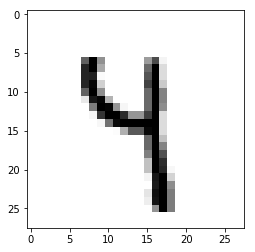

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

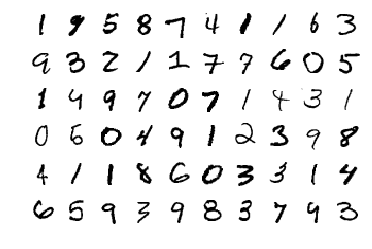

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) 
loss = criterion(logps, labels) 

In [10]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040],
        ...,
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [-0.0035, -0.0035, -0.0035,  ..., -0.0035, -0.0035, -0.0035]])


In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        
        loss.backward()
        
       
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6491854693700891
Epoch 1 - Training loss: 0.28685584568233885
Epoch 2 - Training loss: 0.22334983259407695
Epoch 3 - Training loss: 0.18385178819775327
Epoch 4 - Training loss: 0.15190173410324018
Epoch 5 - Training loss: 0.13075213744712155
Epoch 6 - Training loss: 0.11489261692362045
Epoch 7 - Training loss: 0.10119929628125005
Epoch 8 - Training loss: 0.09086166155030097
Epoch 9 - Training loss: 0.08136980958394151
Epoch 10 - Training loss: 0.07427117376645873
Epoch 11 - Training loss: 0.06818374859959458
Epoch 12 - Training loss: 0.06259782105160039
Epoch 13 - Training loss: 0.05776696575523567
Epoch 14 - Training loss: 0.052666892073174786

Training Time (in minutes) = 2.2660927812258405


In [13]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.975


In [16]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 0


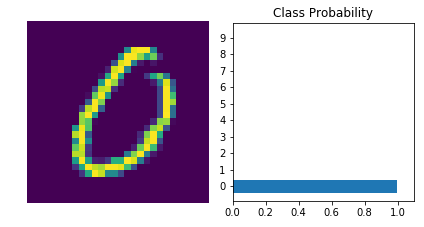

In [17]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)